# Loading Basic Dependencies

In [1]:
#loading basic dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
data = pd.read_csv("Climate.csv")
data['date'] = pd.to_datetime(data['date'],format="%Y-%m")
data = data.set_index('date')
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


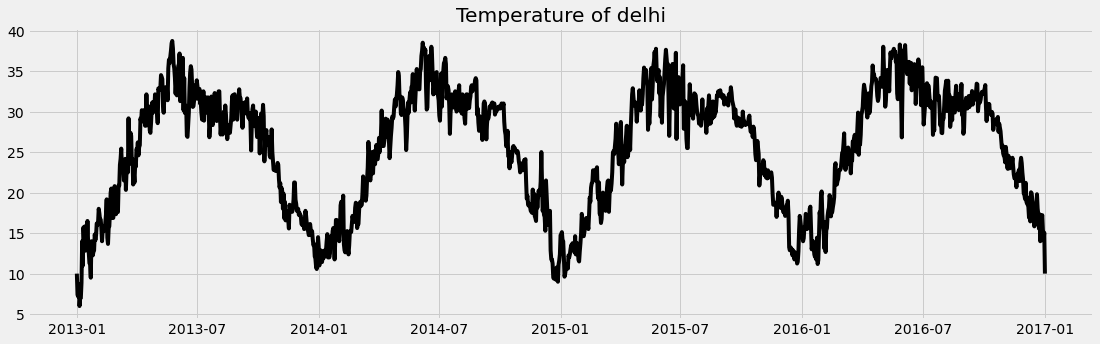

In [3]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['meantemp'],color='black')
plt.title("Temperature of delhi")
plt.show()

# KPSS Test

In [4]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['meantemp'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

KPSS Statistic: 0.1948270141059301
p-value: 0.1
num lags: 24
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


# Auto Correlation function

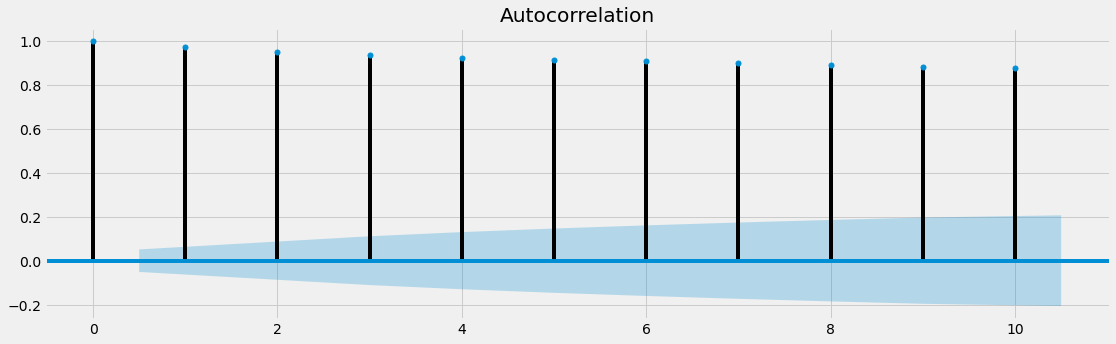

In [5]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['meantemp'], ax=plt.gca(), lags=10)
plt.show()

# Partial Correlation function

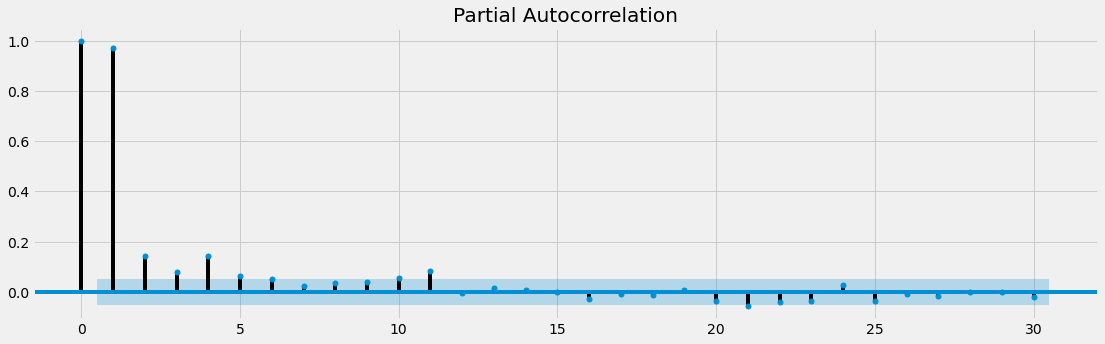

In [6]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['meantemp'], ax=plt.gca(), lags=30)
plt.show()

# Splitting Dataset

In [7]:
length_train = 1046
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

# ARIMAX Model

In [8]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train['meantemp'], order=(1,0,3), exog= train['humidity'])
model_fit = model.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


const             31.254084
humidity          -0.132910
ar.L1.meantemp     0.995058
ma.L1.meantemp    -0.093103
ma.L2.meantemp    -0.170477
ma.L3.meantemp    -0.194071
dtype: float64


In [9]:
y_arimax = data.copy()
y_arimax['arimax_forecast'] = model_fit.predict(test['meantemp'].index.min(), test['meantemp'].index.max(), exog= test['humidity'])

## Plotting Train, Test and Forecasted data

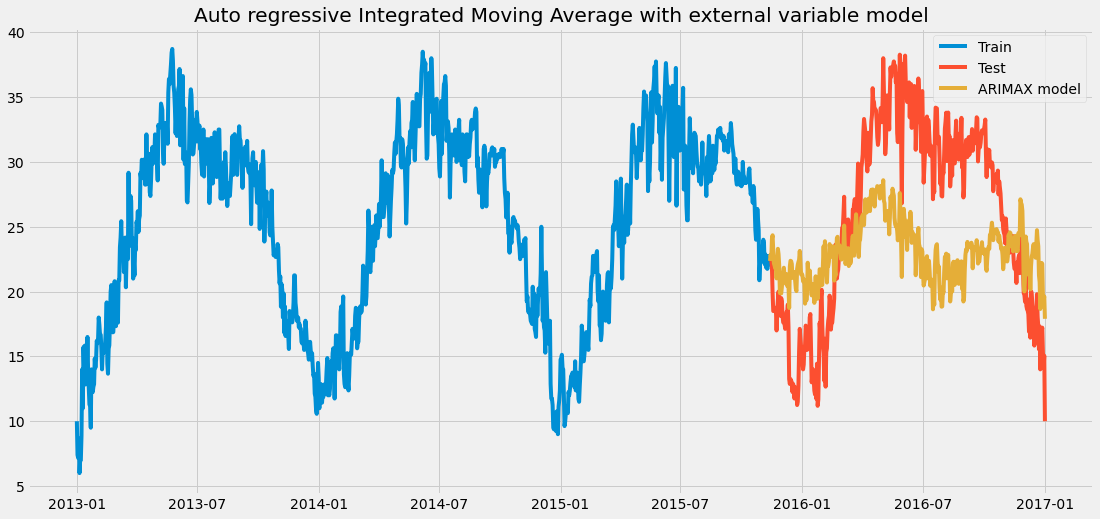

In [10]:
plt.figure(figsize=(17,8))

plt.plot(train['meantemp'], label = 'Train')
plt.plot(test['meantemp'], label = 'Test')
plt.plot(y_arimax['arimax_forecast'][test['meantemp'].index.min():], label = 'ARIMAX model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average with external variable model')
plt.show()

# Splitting Train and Test data

In [11]:
length_train = 1046
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

# SARIMAX Model

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['meantemp'], order=(7,0,3), seasonal_order=(2,1,1,12), exog =train['humidity'])
model_fit = model.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


humidity   -0.131444
ar.L1      -1.271635
ar.L2      -0.177446
ar.L3       0.867326
ar.L4       0.767982
ar.L5       0.260044
ar.L6       0.377432
ar.L7       0.176123
ma.L1       2.197999
ma.L2       2.126830
ma.L3       0.895488
ar.S.L12    0.030005
ar.S.L24    0.030971
ma.S.L12   -0.982502
sigma2      1.571901
dtype: float64


In [13]:
y_sarimax = data.copy()
y_sarimax['sarimax_forecast'] = model_fit.predict(test['meantemp'].index.min(),
                                                  test['meantemp'].index.max(),
                                                  exog= test['humidity'])

## Plotting Train, Test and Forecasted data

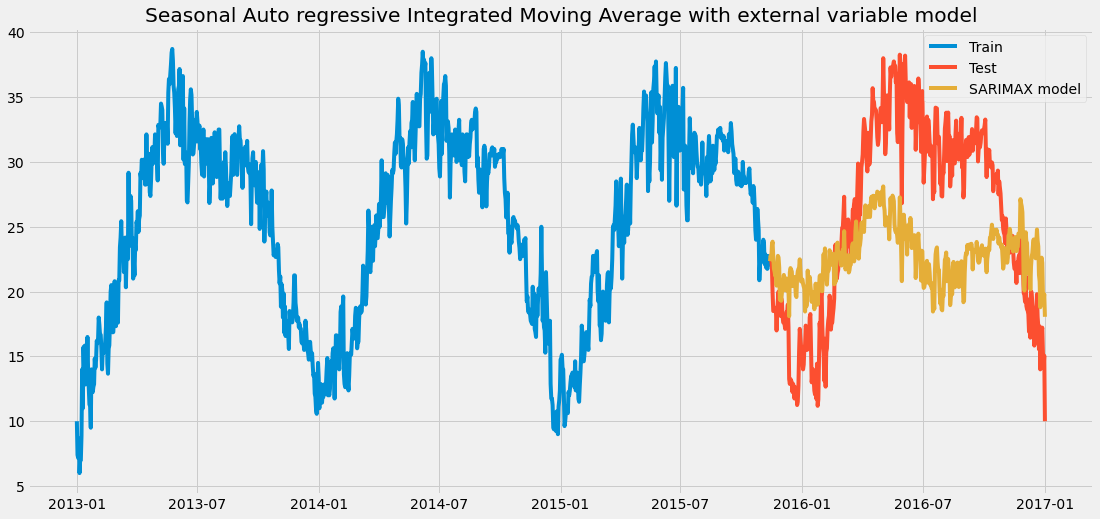

In [14]:
plt.figure(figsize=(17,8))

plt.plot(train['meantemp'], label = 'Train')
plt.plot(test['meantemp'], label = 'Test')
plt.plot(y_sarimax['sarimax_forecast'][test['meantemp'].index.min():], label = 'SARIMAX model')

plt.legend()
plt.title('Seasonal Auto regressive Integrated Moving Average with external variable model')
plt.show()